In [1]:
import sys
from pathlib import Path
repo_root = Path.cwd().parent
sys.path.append(str(repo_root))


In [2]:
import yfinance as yf
import pandas as pd
import os
import sys
from momentumhk.MomentumBacktestClass import MomentumVectorBacktest as MVB

In [7]:
K = MVB(
    symbol='9999.HK',
    start='2023-12-01',
    end='2025-06-30',
    amount=10000,
    tc=0.0,
    pull_data=False,  # True -> get_data(); False -> load CSV
)

In [8]:
K.data

,Date,Close,Open,Volume
0,2020-06-11,128.408615,131.371891,54549198
1,2020-06-12,126.926964,124.457568,18364472
2,2020-06-15,123.568588,125.445331,17734920
3,2020-06-16,128.112274,127.025749,11099659
4,2020-06-17,126.531868,127.420845,6219498
...,...,...,...,...
1320,2025-10-23,228.199997,224.800003,3533481
1321,2025-10-24,230.600006,230.800003,4545265
1322,2025-10-27,230.000000,233.399994,4432192
1323,2025-10-28,224.600006,228.399994,7264252


In [11]:
K.run_strategy(9)

'buy&hold: 63.77%, strategy: -73.76%, alpha: -137.53%'

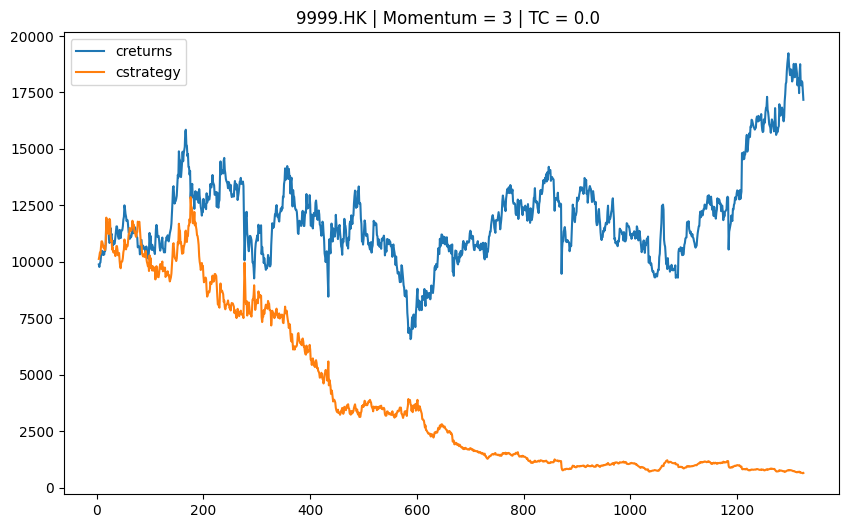

In [10]:
K.plot_results()